In [2]:
from autograd import grad, jacobian, hessian
import autograd.numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_value_pairs(f, q: float, m: int):
    return np.vstack([(x, f(x)) for x in np.linspace(-q, q, m)]).T

In [4]:
X = get_value_pairs(np.sin, np.pi, 100)

In [5]:
def p(x, a):
    return np.dot(a, np.array([x**i for i in range(len(a))]))

In [6]:
params = np.array([0.001, 0.001, 0.001, 0.001, 0.001])

(5,)


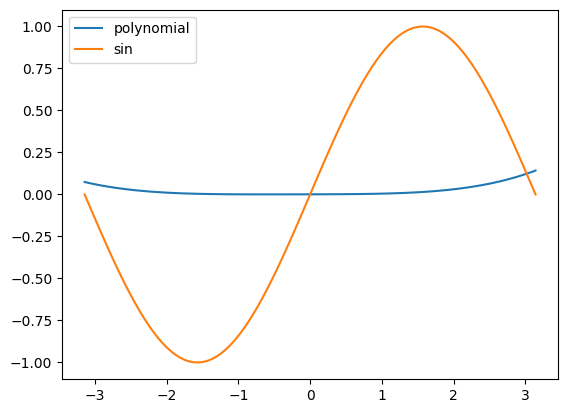

In [7]:
# initial polynomial
print(params.shape)
plt.plot(X[0], p(X[0], params))
plt.plot(X[0], X[1])
plt.legend(['polynomial', 'sin'])
plt.show()

In [8]:
def loss(params):
    return 1/2 * np.sum((p(X[0], params)-X[1])**2)

In [9]:
def backtracking(f, x, grad_x, p, c=0.5, rho=0.75, method: str = "nt"):
    alpha = 1 if method == "nt" else 0.1
    while f(x+alpha*p) > f(x)+c*alpha*np.dot(grad_x, p):
        alpha *= rho
    return alpha

21.32333533875757
2.69384949023025
0.5483553070196794
0.277180786159341
0.24277611155773196
0.23842487125185785
0.23787384940089082
0.2378040188169716
0.23779519087336667
0.2377940700896093
0.23779392803205524
0.23779390991829785
0.23779390756773744
0.23779390724905325
0.23779390719984533
0.2377939071899627
0.23779390718719742
0.23779390718624355
0.23779390718623014
0.23779390718623014


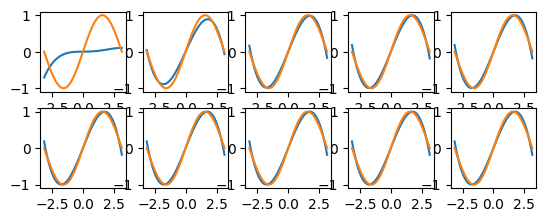

In [10]:
# gradient descent
for i in range(10_000):
    grad_loss = grad(loss)(params)
    alpha = backtracking(loss, params, grad_loss, -grad_loss, method="sd")
    old_loss = loss(params)
    params -= alpha*grad_loss
    if i % 500 == 0:
        print(loss(params))
    if np.linalg.norm(grad_loss) < 1e-6 or np.linalg.norm(loss(params)) < 1e-6 or np.linalg.norm(p(X[0], params)-X[1]) < 1e-6:
        break
    if i % 1000 == 0:
        plt.subplot(4, 5, i//1000+1)
        plt.plot(X[0], p(X[0], params))
        plt.plot(X[0], X[1])
plt.show()

In [11]:
print(f"final loss: {loss(params)}")
print(f"final params: {params}")
print(f"final polynomial: {p(X[0], params)}")
print(f"final gradient: {grad_loss}")
print(f"final gradient norm: {np.linalg.norm(grad_loss)}")
print(f"iterations: {i}")

final loss: 0.23779390718623014
final params: [ 1.98999115e-07  8.52213808e-01 -1.07204448e-07 -9.22671345e-02
  1.01887641e-08]
final polynomial: [ 0.18355179  0.06773248 -0.04122288 -0.14345582 -0.23910785 -0.32832051
 -0.41123531 -0.48799378 -0.55873745 -0.62360784 -0.68274648 -0.73629489
 -0.78439459 -0.82718712 -0.86481399 -0.89741673 -0.92513687 -0.94811593
 -0.96649543 -0.98041691 -0.99002188 -0.99545187 -0.9968484  -0.99435301
 -0.9881072  -0.97825252 -0.96493048 -0.94828261 -0.92845044 -0.90557548
 -0.87979927 -0.85126332 -0.82010917 -0.78647833 -0.75051234 -0.71235271
 -0.67214098 -0.63001866 -0.58612728 -0.54060837 -0.49360346 -0.44525405
 -0.39570169 -0.3450879  -0.29355419 -0.2412421  -0.18829315 -0.13484886
 -0.08105076 -0.02704037  0.02704077  0.08105116  0.13484925  0.18829353
  0.24124248  0.29355456  0.34508826  0.39570204  0.44525439  0.49360378
  0.54060868  0.58612757  0.63001893  0.67214123  0.71235294  0.75051255
  0.78647852  0.82010933  0.85126346  0.87979938  

0.23779390718563978


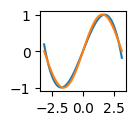

In [12]:
params = np.array([0.001, 0.001, 0.001, 0.001, 0.001])
for i in range(10_000):
    grad_loss = grad(loss)(params)
    hess_loss = hessian(loss)(params)
    alpha = backtracking(loss, params, grad_loss, -np.linalg.solve(hess_loss, grad_loss), method="nt")
    old_loss = loss(params)
    params -= alpha*np.linalg.solve(hess_loss, grad_loss)
    if i % 500 == 0:
        print(loss(params))
    if np.linalg.norm(grad_loss) < 1e-6 or np.linalg.norm(loss(params)) < 1e-6 or np.linalg.norm(p(X[0], params)-X[1]) < 1e-6:
        break
    if i % 1000 == 0:
        plt.subplot(4, 5, i//1000+1)
        plt.plot(X[0], p(X[0], params))
        plt.plot(X[0], X[1])
plt.show()

In [13]:
print(f"final loss: {loss(params)}")
print(f"final params: {params}")
print(f"final polynomial: {p(X[0], params)}")
print(f"final gradient: {grad_loss}")
print(f"final gradient norm: {np.linalg.norm(grad_loss)}")
print(f"iterations: {i}")

final loss: 0.23779390718563967
final params: [-1.21359140e-18  8.52213827e-01 -3.57956524e-17 -9.22671371e-02
  5.89104004e-18]
final polynomial: [ 0.18355168  0.0677324  -0.04122293 -0.14345585 -0.23910786 -0.32832049
 -0.41123528 -0.48799374 -0.5587374  -0.62360778 -0.68274641 -0.73629482
 -0.78439452 -0.82718705 -0.86481392 -0.89741667 -0.92513681 -0.94811587
 -0.96649538 -0.98041687 -0.99002184 -0.99545184 -0.99684839 -0.994353
 -0.98810721 -0.97825254 -0.96493051 -0.94828266 -0.92845049 -0.90557555
 -0.87979934 -0.85126341 -0.82010927 -0.78647844 -0.75051246 -0.71235284
 -0.67214112 -0.63001881 -0.58612744 -0.54060854 -0.49360363 -0.44525423
 -0.39570188 -0.34508808 -0.29355438 -0.24124229 -0.18829334 -0.13484906
 -0.08105096 -0.02704057  0.02704057  0.08105096  0.13484906  0.18829334
  0.24124229  0.29355438  0.34508808  0.39570188  0.44525423  0.49360363
  0.54060854  0.58612744  0.63001881  0.67214112  0.71235284  0.75051246
  0.78647844  0.82010927  0.85126341  0.87979934  0.

In [14]:
def generic_loss(f, X, params):
    return 1/2 * np.sum((f(X[0], params)-X[1])**2)

def steepest_descent(fun, deg, m, q, params=None):
    X = get_value_pairs(fun, q, m)
    params = np.array([0.001 for _ in range(deg+1)]) if params is None else params
    p = lambda x, a: np.dot(a, np.array([x**i for i in range(len(a))]))
    loss = lambda a: generic_loss(p, X, a)
    for i in range(10_000):
        grad_loss = grad(loss)(params)
        alpha = backtracking(loss, params, grad_loss, -grad_loss, method="sd")
        params -= alpha*grad_loss
        if i % 500 == 0:
            print(loss(params))
        if np.linalg.norm(grad_loss) < 1e-6 or np.linalg.norm(loss(params)) < 1e-6 or np.linalg.norm(p(X[0], params)-X[1]) < 1e-6:
            break
        if i % 1000 == 0:
            plt.subplot(4, 5, i//1000+1)
            plt.plot(X[0], p(X[0], params))
            plt.plot(X[0], X[1])
    plt.show()
    print(f"final loss: {loss(params)}")
    print(f"final params: {params}")
    print(f"final polynomial: {p(X[0], params)}")
    print(f"final gradient: {grad_loss}")
    print(f"final gradient norm: {np.linalg.norm(grad_loss)}")
    print(f"iterations: {i}")

21.32333533875757
2.69384949023025
0.5483553070196794
0.277180786159341
0.24277611155773196
0.23842487125185785
0.23787384940089082
0.2378040188169716
0.23779519087336667
0.2377940700896093
0.23779392803205524
0.23779390991829785
0.23779390756773744
0.23779390724905325
0.23779390719984533
0.2377939071899627
0.23779390718719742
0.23779390718624355
0.23779390718623014
0.23779390718623014


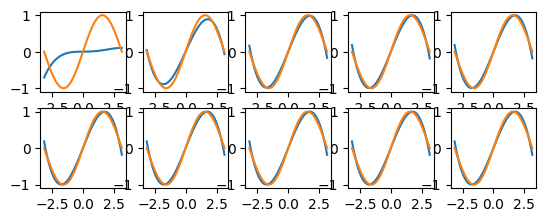

final loss: 0.23779390718623014
final params: [ 1.98999115e-07  8.52213808e-01 -1.07204448e-07 -9.22671345e-02
  1.01887641e-08]
final polynomial: [ 0.18355179  0.06773248 -0.04122288 -0.14345582 -0.23910785 -0.32832051
 -0.41123531 -0.48799378 -0.55873745 -0.62360784 -0.68274648 -0.73629489
 -0.78439459 -0.82718712 -0.86481399 -0.89741673 -0.92513687 -0.94811593
 -0.96649543 -0.98041691 -0.99002188 -0.99545187 -0.9968484  -0.99435301
 -0.9881072  -0.97825252 -0.96493048 -0.94828261 -0.92845044 -0.90557548
 -0.87979927 -0.85126332 -0.82010917 -0.78647833 -0.75051234 -0.71235271
 -0.67214098 -0.63001866 -0.58612728 -0.54060837 -0.49360346 -0.44525405
 -0.39570169 -0.3450879  -0.29355419 -0.2412421  -0.18829315 -0.13484886
 -0.08105076 -0.02704037  0.02704077  0.08105116  0.13484925  0.18829353
  0.24124248  0.29355456  0.34508826  0.39570204  0.44525439  0.49360378
  0.54060868  0.58612757  0.63001893  0.67214123  0.71235294  0.75051255
  0.78647852  0.82010933  0.85126346  0.87979938  

In [15]:
steepest_descent(np.sin, 4, 100, np.pi)

In [16]:
def newton_method(f, deg, m, q, params=None):
    X = get_value_pairs(f, q, m)
    params = np.array([0.001 for _ in range(deg+1)]) if params is None else params
    p = lambda x, a: np.dot(a, np.array([x**i for i in range(len(a))]))
    loss = lambda a: generic_loss(p, X, a)
    for i in range(10_000):
        grad_loss = grad(loss)(params)
        hess_loss = hessian(loss)(params)
        alpha = backtracking(loss, params, grad_loss, -np.linalg.solve(hess_loss, grad_loss), method="nt")
        params -= alpha*np.linalg.solve(hess_loss, grad_loss)
        if i % 500 == 0:
            print(loss(params))
        if i % 1000 == 0:
            plt.subplot(4, 5, i//1000+1)
            plt.plot(X[0], p(X[0], params))
            plt.plot(X[0], X[1])
        if np.linalg.norm(grad_loss) < 1e-6 or np.linalg.norm(loss(params)) < 1e-6 or np.linalg.norm(p(X[0], params)-X[1]) < 1e-6:
            break
    plt.show()
    print(f"final loss: {loss(params)}")
    print(f"final params: {params}")
    print(f"final polynomial: {p(X[0], params)}")
    print(f"final gradient: {grad_loss}")
    print(f"final gradient norm: {np.linalg.norm(grad_loss)}")
    print(f"iterations: {i}")

0.9811702963857747


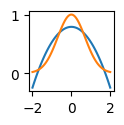

final loss: 0.9811702963857747
final params: [ 7.89979204e-01 -2.31798134e-17 -2.59632910e-01]
final polynomial: [-0.24855243 -0.20701541 -0.16632607 -0.12648444 -0.08749049 -0.04934424
 -0.01204569  0.02440517  0.06000834  0.09476381  0.12867159  0.16173167
  0.19394406  0.22530875  0.25582575  0.28549506  0.31431667  0.34229058
  0.36941681  0.39569533  0.42112617  0.4457093   0.46944475  0.4923325
  0.51437255  0.53556491  0.55590958  0.57540655  0.59405583  0.61185741
  0.6288113   0.6449175   0.66017599  0.6745868   0.68814991  0.70086533
  0.71273305  0.72375308  0.73392541  0.74325005  0.75172699  0.75935624
  0.7661378   0.77207166  0.77715783  0.7813963   0.78478708  0.78733016
  0.78902555  0.78987324  0.78987324  0.78902555  0.78733016  0.78478708
  0.7813963   0.77715783  0.77207166  0.7661378   0.75935624  0.75172699
  0.74325005  0.73392541  0.72375308  0.71273305  0.70086533  0.68814991
  0.6745868   0.66017599  0.6449175   0.6288113   0.61185741  0.59405583
  0.57540655

In [17]:
newton_method(lambda x: np.exp(-x**2), 2, 100, 2, np.array([1, 0.1, 0.1]))

1.4410745733418406


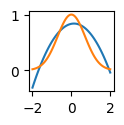

final loss: 0.9811702963857764
final params: [ 7.89979212e-01  6.72002826e-15 -2.59632911e-01]
final polynomial: [-0.24855243 -0.20701541 -0.16632607 -0.12648443 -0.08749049 -0.04934424
 -0.01204569  0.02440517  0.06000834  0.09476381  0.12867159  0.16173167
  0.19394406  0.22530876  0.25582576  0.28549506  0.31431667  0.34229059
  0.36941681  0.39569534  0.42112617  0.44570931  0.46944475  0.4923325
  0.51437256  0.53556492  0.55590959  0.57540656  0.59405584  0.61185742
  0.62881131  0.6449175   0.660176    0.67458681  0.68814992  0.70086533
  0.71273306  0.72375308  0.73392542  0.74325006  0.751727    0.75935625
  0.76613781  0.77207167  0.77715783  0.78139631  0.78478708  0.78733017
  0.78902556  0.78987325  0.78987325  0.78902556  0.78733017  0.78478708
  0.78139631  0.77715783  0.77207167  0.76613781  0.75935625  0.751727
  0.74325006  0.73392542  0.72375308  0.71273306  0.70086533  0.68814992
  0.67458681  0.660176    0.6449175   0.62881131  0.61185742  0.59405584
  0.57540656  

In [18]:
steepest_descent(lambda x: np.exp(-x**2), 2, 100, 2, np.array([1, 0.1, 0.1]))

50088562.79242988
4764.330675235679
4482.501526722981
4315.058070442685
4181.257999770329
4066.000589112922
3965.5508821240655
3877.7902552506825
3789.9502819437225
3704.3313337397167
3622.5712726834204
3552.8988890895403
3481.4468254449976
3417.0720037218575
3359.4858859604583
3300.400918088385
3240.832852916581
3185.3845776823277
3137.4010218427075
3085.7628761542783


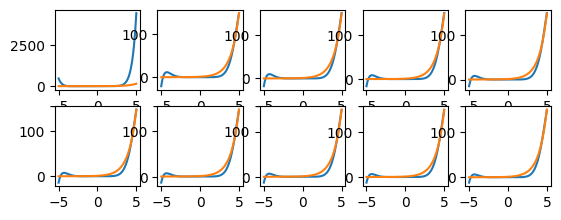

final loss: 3039.7478530994995
final params: [ 1.00018525e-03  1.00084747e-03  1.00098575e-03  1.00859500e-03
  1.00541328e-03  1.09005704e-03  1.01011438e-03  1.75501460e-03
  7.00038365e-04 -3.18418611e-05 -2.27908457e-05]
final polynomial: [-1.11338091e+01 -7.80477990e+00 -4.97829975e+00 -2.59769343e+00
 -6.11420453e-01  1.02730374e+00  2.36086411e+00  3.42758091e+00
  4.26202409e+00  4.89530823e+00  5.35536901e+00  5.66722193e+00
  5.85320436e+00  5.93320165e+00  5.92485808e+00  5.84377354e+00
  5.70368657e+00  5.51664461e+00  5.29316201e+00  5.04236660e+00
  4.77213533e+00  4.48921974e+00  4.19936172e+00  3.90740021e+00
  3.61736929e+00  3.33258833e+00  3.05574453e+00  2.78896837e+00
  2.53390258e+00  2.29176472e+00  2.06340420e+00  1.84935377e+00
  1.64987609e+00  1.46500555e+00  1.29458594e+00  1.13830392e+00
  9.95718962e-01  8.66289806e-01  7.49397793e-01  6.44367336e-01
  5.50483736e-01  4.67008610e-01  3.93193108e-01  3.28289150e-01
  2.71558856e-01  2.22282355e-01  1.797641

In [23]:
steepest_descent(lambda x: np.exp(x), 10, 200, 5)

34977515.50544109


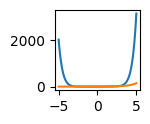

final loss: 0.00016969448087449644
final params: [9.99718459e-01 1.00315935e+00 5.00861109e-01 1.63998165e-01
 4.12464694e-02 8.95228071e-03 1.46267500e-03 1.41276290e-04
 1.90736193e-05 4.95103696e-06 4.71432228e-07]
final polynomial: [1.04006482e-02 8.39216459e-03 7.14741506e-03 6.51502946e-03
 6.36580408e-03 6.59032378e-03 7.09677607e-03 7.80894579e-03
 8.66437926e-03 9.61270769e-03 1.06141196e-02 1.16379730e-02
 1.26615375e-02 1.36688589e-02 1.46497365e-02 1.55988063e-02
 1.65147217e-02 1.73994259e-02 1.82575068e-02 1.90956311e-02
 1.99220488e-02 2.07461633e-02 2.15781620e-02 2.24287020e-02
 2.33086456e-02 2.42288412e-02 2.51999458e-02 2.62322844e-02
 2.73357426e-02 2.85196895e-02 2.97929263e-02 3.11636594e-02
 3.26394927e-02 3.42274386e-02 3.59339444e-02 3.77649313e-02
 3.97258451e-02 4.18217153e-02 4.40572222e-02 4.64367693e-02
 4.89645607e-02 5.16446807e-02 5.44811760e-02 5.74781388e-02
 6.06397895e-02 6.39705588e-02 6.74751689e-02 7.11587116e-02
 7.50267252e-02 7.90852675e-02 8

In [24]:
newton_method(lambda x: np.exp(x), 10, 200, 5)

38.19484064055855
10.256385748536218
6.112684011971098
3.7401594872939206
2.358181454189671
1.5697268580081347
1.107473878086159
0.8411384449937853
0.6876618898043563
0.5992291138257398
0.5482743655319381
0.5189143464616719
0.5019971497940334
0.4922494749469285
0.48663286190899074
0.4833965587773685
0.4815317870749073
0.48045729116426866
0.47983815281172537
0.4794813927025376


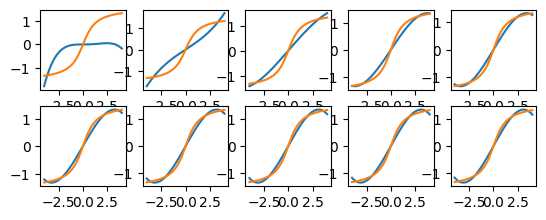

final loss: 0.4792759742333691
final params: [ 1.21724553e-04  6.54078876e-01 -3.70799283e-05 -2.27776840e-02
  1.93793265e-06]
final polynomial: [-1.15851917 -1.19225646 -1.22249432 -1.24930496 -1.27276061 -1.29293345
 -1.30989571 -1.32371957 -1.33447723 -1.34224091 -1.34708279 -1.34907506
 -1.34828993 -1.34479957 -1.33867618 -1.32999195 -1.31881905 -1.30522968
 -1.28929601 -1.27109022 -1.25068448 -1.22815098 -1.20356187 -1.17698934
 -1.14850556 -1.11818268 -1.08609288 -1.05230831 -1.01690113 -0.97994352
 -0.94150761 -0.90166557 -0.86048954 -0.81805169 -0.77442416 -0.72967908
 -0.68388862 -0.63712491 -0.58946009 -0.54096631 -0.49171569 -0.44178037
 -0.39123249 -0.34014418 -0.28858756 -0.23663476 -0.18435791 -0.13182913
 -0.07912054 -0.02630426  0.02654759  0.0793629   0.13206956  0.18459545
  0.23686847  0.28881651  0.34036746  0.39144923  0.4419897   0.49191678
  0.54115838  0.58964239  0.63729673  0.6840493   0.72982802  0.7745608
  0.81817555  0.86060019  0.90176264  0.94159081  0.

In [29]:
steepest_descent(lambda x: np.arctan(x), 4, 100, 4)

3.695196217181619


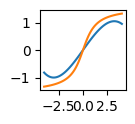

final loss: 0.478996157972693
final params: [ 1.89485772e-17  6.56614160e-01 -1.75004612e-17 -2.29954893e-02
  1.52680711e-18]
final polynomial: [-1.15474532 -1.18909044 -1.21990454 -1.24726042 -1.2712309  -1.29188877
 -1.30930684 -1.32355791 -1.33471479 -1.34285029 -1.3480372  -1.35034833
 -1.34985649 -1.34663448 -1.34075511 -1.33229117 -1.32131548 -1.30790084
 -1.29212005 -1.27404592 -1.25375126 -1.23130886 -1.20679153 -1.18027208
 -1.1518233  -1.12151802 -1.08942902 -1.05562911 -1.02019111 -0.98318781
 -0.94469201 -0.90477653 -0.86351416 -0.82097772 -0.77724    -0.73237381
 -0.68645196 -0.63954724 -0.59173247 -0.54308045 -0.49366397 -0.44355586
 -0.39282891 -0.34155592 -0.28980971 -0.23766307 -0.18518881 -0.13245973
 -0.07954864 -0.02652835  0.02652835  0.07954864  0.13245973  0.18518881
  0.23766307  0.28980971  0.34155592  0.39282891  0.44355586  0.49366397
  0.54308045  0.59173247  0.63954724  0.68645196  0.73237381  0.77724
  0.82097772  0.86351416  0.90477653  0.94469201  0.983

In [30]:
newton_method(lambda x: np.arctan(x), 4, 100, 4)

12.34955004512961
0.024356100673936024
0.02240343980196073
0.02225542942774015
0.022244056265626137
0.022243209356080915
0.022243142360322925
0.02224313716074527
0.022243136735529852


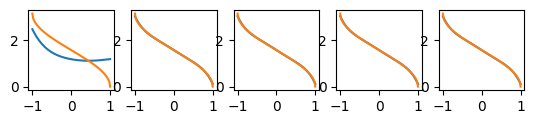

final loss: 0.022243136709198304
final params: [ 1.57079635e+00 -1.07192370e+00  7.92116436e-09  3.10691387e-01
  5.12924894e-09 -6.95810827e-01]
final polynomial: [3.0278395  2.95713546 2.89102933 2.82921277 2.7713908  2.71728151
 2.66661573 2.61913685 2.57460045 2.53277406 2.49343685 2.4563794
 2.42140338 2.38832125 2.35695604 2.32714102 2.29871944 2.27154422
 2.24547774 2.22039146 2.19616572 2.17268943 2.14985976 2.12758193
 2.10576885 2.0843409  2.0632256  2.04235738 2.02167726 2.00113257
 1.98067671 1.96026881 1.93987349 1.91946058 1.8990048  1.87848554
 1.85788651 1.83719552 1.81640416 1.79550754 1.77450398 1.75339479
 1.73218391 1.71087769 1.68948458 1.66801485 1.64648033 1.62489411
 1.60327026 1.58162354 1.55996916 1.53832244 1.51669858 1.49511236
 1.47357784 1.45210812 1.43071501 1.40940879 1.38819791 1.36708871
 1.34608516 1.32518854 1.30439717 1.28370618 1.26310716 1.24258789
 1.22213212 1.2017192  1.18132389 1.16091599 1.14046012 1.11991544
 1.09923532 1.0783671  1.0572518 

In [33]:
steepest_descent(lambda x: np.arccos(x), 5, 100, 1)

0.022243136702740224


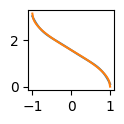

final loss: 0.022243136702740224
final params: [ 1.57079633e+00 -1.07192609e+00 -6.87997411e-17  3.10701728e-01
 -1.06542807e-17 -6.95819666e-01]
final polynomial: [3.02784036 2.95713603 2.89102965 2.82921288 2.77139074 2.7172813
 2.66661542 2.61913646 2.5746     2.53277356 2.49343634 2.45637889
 2.42140287 2.38832077 2.35695559 2.32714062 2.29871908 2.27154392
 2.24547749 2.22039128 2.1961656  2.17268937 2.14985976 2.12758199
 2.10576897 2.08434107 2.06322582 2.04235765 2.02167757 2.00113292
 1.98067708 1.96026921 1.93987391 1.91946101 1.89900524 1.87848598
 1.85788695 1.83719595 1.81640457 1.79550793 1.77450435 1.75339513
 1.73218422 1.71087796 1.68948481 1.66801504 1.64648048 1.62489421
 1.60327031 1.58162354 1.55996911 1.53832235 1.51669844 1.49511218
 1.47357761 1.45210785 1.43071469 1.40940844 1.38819753 1.3670883
 1.34608473 1.32518808 1.30439671 1.28370571 1.26310668 1.24258741
 1.22213165 1.20171874 1.18132345 1.16091557 1.14045974 1.11991509
 1.099235   1.07836683 1.05725158 

In [34]:
newton_method(lambda x: np.arccos(x), 5, 100, 1)

16.61188059241819
0.17834642810908372
0.027611682324842592
0.004679498143970723
0.0011696049687633704
0.0006352658957277762
0.000553977413990348
0.000541544336253999
0.0005396427104756024
0.0005393532154537316
0.000539309173746888
0.0005393024328775924
0.0005393014073580171
0.0005393012505149756
0.0005393012266533884
0.000539301223001255


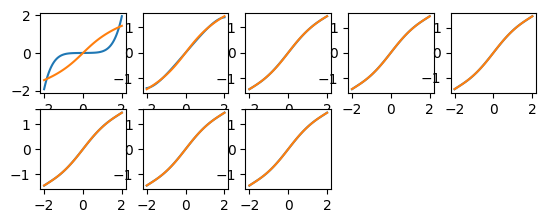

final loss: 0.0005393012224669688
final params: [-2.01808854e-17  9.79786856e-01  5.16894274e-17 -1.05190648e-01
 -2.35938541e-17  1.04055786e-02]
final polynomial: [-1.45102704 -1.42911541 -1.40774178 -1.38679288 -1.36616181 -1.34574794
 -1.32545675 -1.30519969 -1.28489408 -1.26446294 -1.24383488 -1.22294395
 -1.20172951 -1.1801361  -1.15811329 -1.13561557 -1.11260221 -1.0890371
 -1.06488864 -1.04012962 -1.01473703 -0.98869198 -0.96197956 -0.93458866
 -0.9065119  -0.87774543 -0.84828886 -0.81814508 -0.78732013 -0.7558231
 -0.72366594 -0.69086338 -0.65743276 -0.62339392 -0.58876904 -0.55358252
 -0.51786085 -0.48163246 -0.44492761 -0.40777823 -0.3702178  -0.3322812
 -0.29400461 -0.25542534 -0.2165817  -0.17751288 -0.13825883 -0.09886007
 -0.05935761 -0.01979281  0.01979281  0.05935761  0.09886007  0.13825883
  0.17751288  0.2165817   0.25542534  0.29400461  0.3322812   0.3702178
  0.40777823  0.44492761  0.48163246  0.51786085  0.55358252  0.58876904
  0.62339392  0.65743276  0.69086338

In [42]:
steepest_descent(lambda x: np.arcsinh(x), 5, 100, 2)

0.000539301222345406


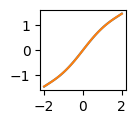

final loss: 0.0005393012223454028
final params: [ 1.00565831e-18  9.79787037e-01 -2.55835470e-17 -1.05190823e-01
  1.29616255e-17  1.04056134e-02]
final polynomial: [-1.45102712 -1.42911546 -1.4077418  -1.38679288 -1.36616179 -1.34574791
 -1.3254567  -1.30519964 -1.28489402 -1.26446288 -1.24383483 -1.2229439
 -1.20172946 -1.18013605 -1.15811324 -1.13561553 -1.11260218 -1.08903708
 -1.06488863 -1.04012961 -1.01473703 -0.988692   -0.96197958 -0.93458869
 -0.90651193 -0.87774547 -0.84828891 -0.81814513 -0.78732019 -0.75582316
 -0.723666   -0.69086345 -0.65743283 -0.62339399 -0.58876911 -0.55358259
 -0.51786092 -0.48163253 -0.44492768 -0.40777829 -0.37021786 -0.33228126
 -0.29400466 -0.25542538 -0.21658173 -0.17751291 -0.13825885 -0.09886009
 -0.05935762 -0.01979281  0.01979281  0.05935762  0.09886009  0.13825885
  0.17751291  0.21658173  0.25542538  0.29400466  0.33228126  0.37021786
  0.40777829  0.44492768  0.48163253  0.51786092  0.55358259  0.58876911
  0.62339399  0.65743283  0.69086

In [43]:
newton_method(lambda x: np.arcsinh(x), 5, 100, 2)